In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from drift_qec import MovingDephasingChannel, BrownianDephasingEstimator, Report, simulate
import seaborn as sns
sns.set_style("whitegrid")

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
channel = MovingDephasingChannel(error_rate=0.01, drift_rate=0.01, max_time=1e4)

est1 = BrownianDephasingEstimator(grains=10000, widening_rate=0.001)
est2 = BrownianDephasingEstimator(grains=10000, widening_rate=0.01)
est3 = BrownianDephasingEstimator(grains=10000, widening_rate=0.1)

report1, report2, report3 = Report(), Report(), Report()
simulate(channel, est1, report1)
simulate(channel, est2, report2)
simulate(channel, est3, report3)

In [10]:
report1.exit_time

2454

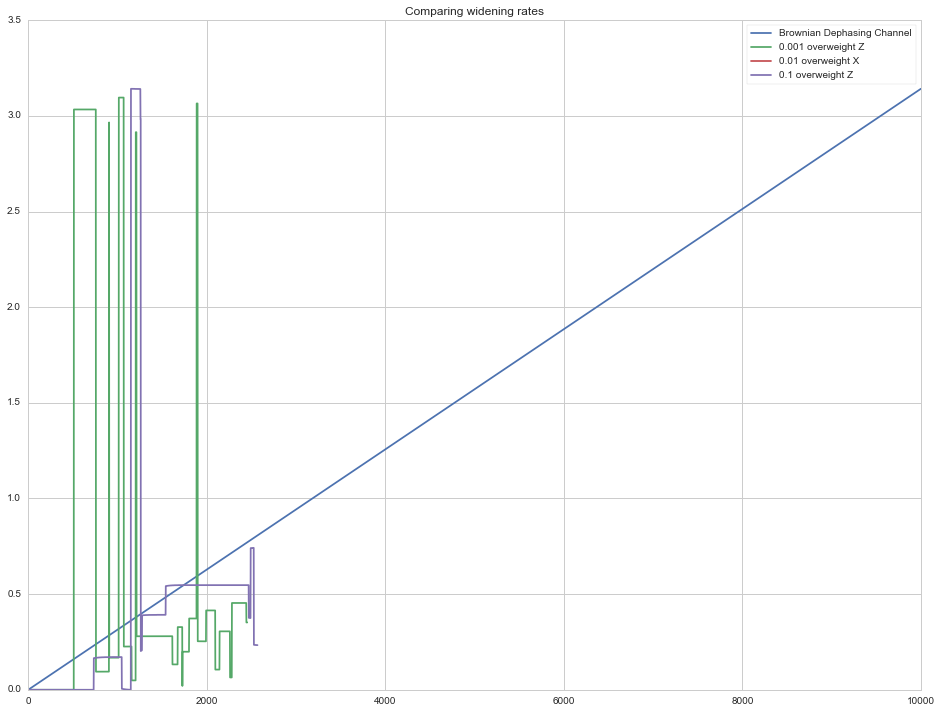

In [6]:
plt.figure(figsize=(16, 12))
plt.plot(channel.time, channel.theta, label="Brownian Dephasing Channel")
plt.plot(report1.time, report1.mle, label=str(est1.widening_rate) + " " + report1.exit_status)
plt.plot(report2.time, report2.mle, label=str(est2.widening_rate) + " " + report2.exit_status)
plt.plot(report3.time, report3.mle, label=str(est3.widening_rate) + " " + report3.exit_status)
plt.title("Comparing widening rates")
plt.legend(frameon=True)